### Лабораторная работа №5

1. **Линейная регрессия**:
   1) Разработать модель линейной регрессии, учитывающую все (в примере), 2, 3 столбца входных переменных.
   2) Рассчитать MSE.
   3) Вывести значения коэффициентов модели.

2. **Полиномиальная регрессия**:
   1) Разработать модель линейной регрессии, базисные функции — полином от исходных значений.
   2) Найти зависимость MSE от максимальной степени полинома. (max_pow <= 10).

3. **Регуляризация. Гребневая регрессия**:
   1) Выбрать оптимальную степень полинома.
   2) Построить график зависимости максимального модуля параметров.
   3) Построить график зависимости MSE от величины alpha.

4. **Регуляризация. Лассо (linear_model.Lasso(alpha=0.1))**:
   1) Выбрать оптимальную степень полинома.
   2) Построить график зависимости максимального модуля параметров.
   3) Построить график зависимости MSE от величины alpha.

5. **SVR**:
   1) Исследовать точность модели регрессии при применении ядерных функций 'poly', 'sigmoid'.
   2) Реализовать модель SVR, учитывающую все характеристики исходных данных, выбрать модель с оптимальными параметрами.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
import math
from sklearn.preprocessing import StandardScaler

In [55]:
data = pd.read_csv('Advertising.csv', index_col=0)
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. **Линейная регрессия**:

In [56]:
def lin_regresion():
    res = []
    params = [
        ['TV', 'radio', 'newspaper'],
        ['TV', 'radio'],
        ['TV', 'newspaper'],
        ['radio', 'newspaper']]
    
    for param in params:
        model = LinearRegression()
        model.fit(X_train[param], y_train)
        y_pred = model.predict(X_test[param])
        mse = round(mean_squared_error(y_test, y_pred), 2)
        coef = np.round(model.coef_, 2)
        res.append({
            'Признаки': ', '.join(param),
            'MSE': mse,
            'Коэффициенты модели': coef
        })
    return pd.DataFrame(res)
        
print(lin_regresion())

               Признаки    MSE Коэффициенты модели
0  TV, radio, newspaper   3.17   [0.04, 0.19, 0.0]
1             TV, radio   3.14        [0.04, 0.19]
2         TV, newspaper  11.06        [0.05, 0.06]
3      radio, newspaper  23.20          [0.2, 0.0]


2. **Полиномиальная регрессия**:


In [70]:
def poly_regression(X_train, X_test, y_train):
    mse_arr = []
    degree = [i for i in range(1, 11)]
    for deg in degree:
        poly = PolynomialFeatures(degree=deg)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.transform(X_test)
        
        model = LinearRegression()
        model.fit(X_poly_train, y_train)
        y_pred = model.predict(X_poly_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mse_arr.append(mse)
        
    return mse_arr

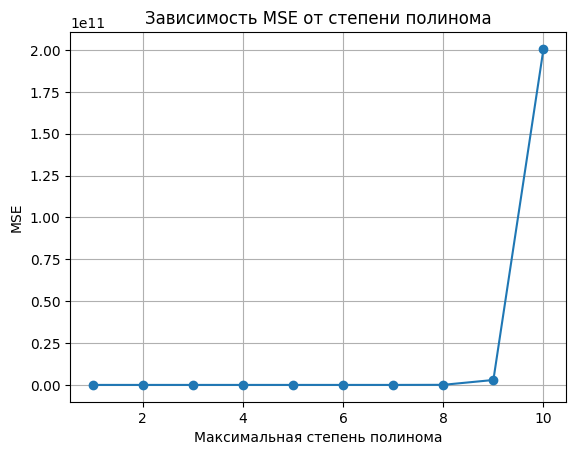

In [71]:
mse = poly_regression(X_train, X_test, y_train)
plt.plot(range(1, 11), mse, marker='o')
plt.xlabel('Максимальная степень полинома')
plt.ylabel('MSE')
plt.title('Зависимость MSE от степени полинома')
plt.grid(True)
plt.show()

3. Регуляризация. Гребневая регрессия

		3.1 Поиск оптимальной степени полинома для гребневой регрессии

In [59]:
def get_degree(X_train, y_train, X_test, y_test, model):
    degree = [i for i in range(1, 11)]
    top_deg = 0
    top_mse = math.inf
    
    for deg in degree:
        poly = PolynomialFeatures(deg)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.transform(X_test)
        
        model.fit(X_poly_train, y_train)
        y_pred = model.predict(X_poly_test)
        
        mse = mean_squared_error(y_test, y_pred)
        
        if mse < top_mse:
            top_mse = mse
            top_deg = deg
    print(f"Оптимальная степень полинома: {top_deg}, MSE = {top_mse}")
    return top_deg

		3.2 Обучение модели с оптимальной степенью полинома и построение графиков

c:\Users\vlada\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.79908e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\vlada\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.24848e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\vlada\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.58819e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\vlada\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.99916e-32): result may not be accurate.
  return linalg.solve

Оптимальная степень полинома: 3, MSE = 0.29456819814167745


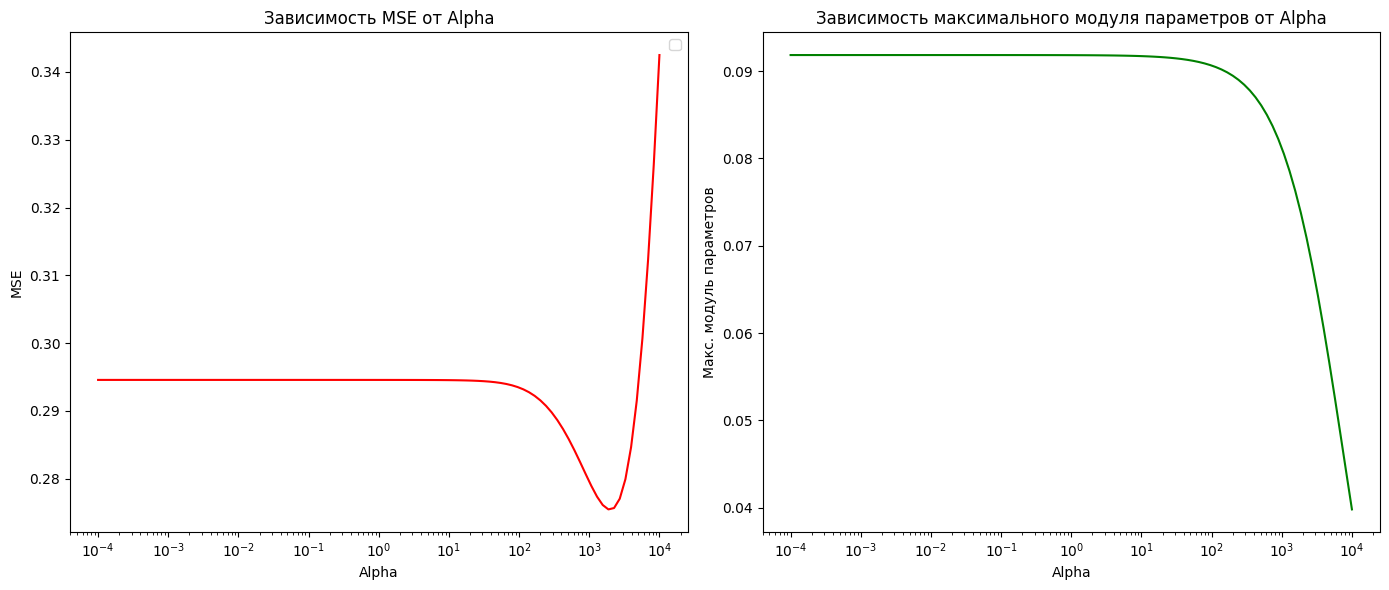

In [73]:
def greb_regression(X_train, y_train, X_test, y_test):
    model = Ridge(alpha=0.1) 
    top_deg = get_degree(X_train, y_train, X_test, y_test, model)
    poly = PolynomialFeatures(top_deg)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    alphas = np.logspace(-4, 4, 100)
    mse_arr = []
    max_coef = []
    
    for alpha in alphas:
        model = Ridge(alpha=alpha)
        model.fit(X_poly_train, y_train)
        
        y_test_pred = model.predict(X_poly_test)
        
        mse_arr.append(mean_squared_error(y_test, y_test_pred))
        max_coef.append(np.max(np.abs(model.coef_)))
    
    _, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].semilogx(alphas, mse_arr, color='red')
    ax[0].set_xlabel('Alpha')
    ax[0].set_ylabel('MSE')
    ax[0].set_title('Зависимость MSE от Alpha')
    ax[0].legend()
    
    ax[1].semilogx(alphas, max_coef, color='green')
    ax[1].set_xlabel('Alpha')
    ax[1].set_ylabel('Макс. модуль параметров')
    ax[1].set_title('Зависимость максимального модуля параметров от Alpha')

    plt.tight_layout()
    plt.show()

    #return alphas, mse_test, max_coef
greb_regression(X_train, y_train, X_test, y_test)

4. Регурялизация. Лассо

c:\Users\vlada\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.990e+01, tolerance: 4.150e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\vlada\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e+01, tolerance: 4.150e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\vlada\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Оптимальная степень полинома: 3, MSE = 0.2494335528037636


c:\Users\vlada\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.814e+01, tolerance: 4.150e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\vlada\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.814e+01, tolerance: 4.150e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\vlada\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

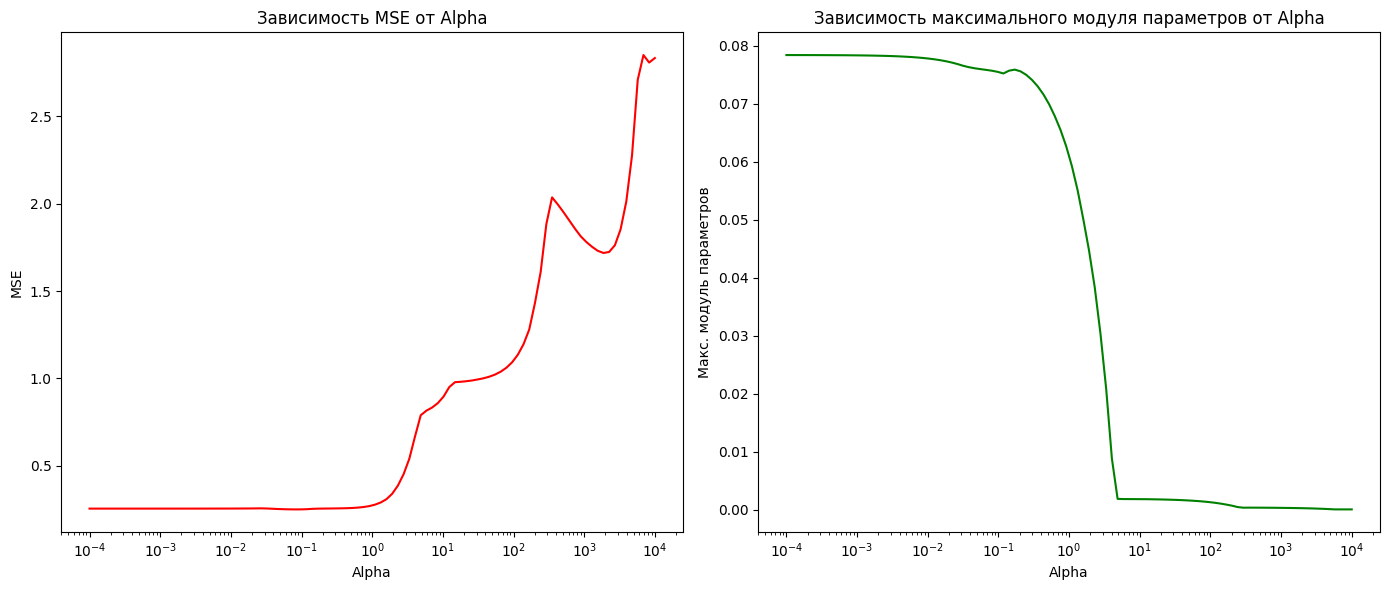

In [84]:
def lasso_reg(X_train, y_train, X_test, y_test):
    model = Lasso(alpha=0.1)
    
    top_deg = get_degree(X_train, y_train, X_test, y_test, model)
    
    poly = PolynomialFeatures(top_deg)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    alphas = np.logspace(-4, 4, 100)
    mse_arr = []
    max_coef = []

    for alpha in alphas:
        model = Lasso(alpha=alpha)
        model.fit(X_poly_train, y_train)
        
        y_test_pred = model.predict(X_poly_test)
    
        mse_arr.append(mean_squared_error(y_test, y_test_pred))
        max_coef.append(np.max(np.abs(model.coef_)))
    
    _, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].semilogx(alphas, mse_arr, color='red')
    ax[0].set_xlabel('Alpha')
    ax[0].set_ylabel('MSE')
    ax[0].set_title('Зависимость MSE от Alpha')
    ax[1].semilogx(alphas, max_coef, color='green')
    ax[1].set_xlabel('Alpha')
    ax[1].set_ylabel('Макс. модуль параметров')
    ax[1].set_title('Зависимость максимального модуля параметров от Alpha')

    plt.tight_layout()
    plt.show()

lasso_reg(X_train, y_train, X_test, y_test)

5. SVR

		5.1 Исследование точности модели регресси при применении ядерных функций 'poly', 'sigmoid'

In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def svr(X_train, y_train, X_test, y_test, kernel):
    model = SVR(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

kernels = ['poly', 'sigmoid']
mse_res = {}

for kernel in kernels:
    mse = svr(X_train_scaled, y_train, X_test_scaled, y_test, kernel)
    mse_res[kernel] = mse
    print(f"Ядро: {kernel}, MSE: {mse}")

Ядро: poly, MSE: 3.8235912256410587
Ядро: sigmoid, MSE: 26.052205191634936


		5.2 Выбор модели с оптимальными параметрами

In [83]:
grid_param = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 0.2, 0.5, 0.7, 1],
    'kernel': ['poly', 'sigmoid', 'rbf', 'linear']
}

grid_search = GridSearchCV(SVR(), grid_param, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

top_params = grid_search.best_params_
top_model = grid_search.best_estimator_

print(f"Оптимальные параметры: {top_params}")
print(f"Оптимальное значение MSE при кросс-валидации: {-grid_search.best_score_}")

y_pred_top = top_model.predict(X_test_scaled)
top_mse = mean_squared_error(y_test, y_pred_top)
print(f"MSE для оптимальной модели с подобранными параметрами: {top_mse}")

Оптимальные параметры: {'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}
Оптимальное значение MSE при кросс-валидации: 0.5296301881998969
MSE для оптимальной модели с подобранными параметрами: 1.0379169651554105
